## SyriaTel Customer Churn Prediction

## Introdunction

## Business Understanding
The telecommunications industry has become very competitive over the years, with customer retention emerging as a critical challenge. One of the major issues facing telecom providers is customer churn - a scenario where users discontinue their service, either due to dissatisfaction from the provider, or due to the availability of better alternatives. High churn rates can significantly impact a company's overall revenue, and scaling potential.

In response to this challenge, telecom companies are exploring churn prediction mechanisms, which will proactively address customer concerns, improve service delivery, and implement targeted retention strategies. In light of this, this project aims to develop a predictive model that will identify customers at risk of churning, helping SyriaTel Telecommunications company minimize churn, and enhance long-term profitability
Enable data-driven decision-making in customer retention strategies.

## Business Problem
SyriaTel, a leading telecom provider, is experiencing a significant loss of customers who are choosing to leave its services for other competitors. To address this challenge, the company seeks to build a robust predictive model capable of identifying customers who are at risk of churning. By leveraging on data-driven insights and predictive modeling, SyriaTel aims to understand the key drivers of customer attrition, determing methods of improving long-term retention of customers, and enhance long-term customer loyalty and profitability.

## Business Objectives
The main objectives for this project are:

To determine the key characteristics and behavior patterns that contribute to customer chur
n.
To build a robust predictive model that will identify customers with a high likelihood of discontinuing their servi
ce.
To provide data-driven insights and recommendations that will proactively engage, and retain high-risk cuers.
e

Specific objectives

The key success metrics for this project are:

To develop a robust churn prediction model that has a recall score of 0.8 and abov
e.
To identify the key features that significantly impact the performance of the mo

To investigate the relationship between international calling behavior and churn.
ors.del.lls.

## Research Questions
Drivers of churn: Which variables (international plan, number of customer service calls) are most strongly associated with churn?

Customer service: Does a higher number of customer service calls correlate with higher churn?

Service plans: Do customers with an international plan or voicemail plan show different churn behaviors?
Prediction: Can we accurately predict whether a customer will churn based on their usage and service attributes?

Usage behavior: How do usage patterns (day vs. night minutes, calls, charges) differ between customers who churn and those who stay?

Retention strategy: Based on our findings, what strategies can SyriaTel implement to reduce churn (improve support, adjust plan offerings, personalized retention campaigns)?

## 2. Data Understanding


The dataset is obtained from Kaggle, specifically from the dataset [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset has 3333 records and 21 columns including numeric, categorical, and boolean variables.The target variable `churn`  indicates whether a customer has left the service (Yes) or remained (No).

Dataset Description:

`state` -	Customer’s state of residence (categorical)

`account length` -	Number of months the customer has been with SyriaTel (numeric)

`area code` -	Customer’s telephone area code (categorical/numeric)

`phone number` -	Customer’s phone number (identifier, usually not used for modeling)

`international plan` -	Whether the customer subscribes to an international calling plan (Yes/No)

`voice mail plan` - 	Whether the customer has a voicemail plan (Yes/No)

`number vmail messages` -	Number of voicemail messages the customer has

`total day minutes` - 	Total minutes of calls during the day

`total day calls` -	Total number of calls during the day

`total day charge`-	Total charges for day calls

`total eve minutes` -	Total minutes of evening calls

`total eve calls` -	Total number of evening calls

`total eve charge` -	Total charges for evening calls

`total night minutes` -	Total minutes of night calls

`total night calls` -	Total number of night calls

`total night charge` -	Total charges for night calls

`total intl minutes` -	Total minutes of international calls

`total intl calls` -	Total number of international calls

`total intl charge` -	Total charges for international calls

`customer service calls` -	Number of calls to customer service

`churn` -	Whether the customer has churned (Yes/No, target variable)

## Load and Explore Data

we import the necessary libraries for our project

In [1]:
# import required libraries

# data loading and manipulation
import pandas as pd
import numpy as np

# data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing and modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from scipy import stats
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc, RocCurveDisplay

# algorithms for supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
# suppress warnings for better readability
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
#loading our dataset 
df=pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
#checking for null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [4]:
#checking for mean,max,min,std
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#checking for the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#checking for the no. of columns and rows
df.shape

(3333, 21)

In [7]:
#number of columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [8]:
# check the shape of the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Numbber of columns: {df.shape[1]}\n")

# display the numerical and categorical columns
print(f"Numerical columns: {df.select_dtypes(include='number').columns}\n")
print(f"Categorical columns: {df.select_dtypes(include='object').columns}\n")

Number of rows: 3333
Numbber of columns: 21

Numerical columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')



## Data Preparation
In this section, we will look into data cleaning techniques, Exploratory Data Analysis (EDA) and data preprocessing (data wrangling) for our dataset. This step is paramount to provide data that will contribute significantly to the performance of the prediction model.

## Data Cleaning
In this section, we perform some data cleaning techniques on the dataset. These techniques include:

Checking for null values and handling the
m.
Checking for duplicate rows and dropping th
em.
Standardizing the columns by adding an underscore between each word in a column, and capitalizing the 1st letter of each word in a column.

In [9]:
# drop the Phone_Number column
df = df.drop('phone number', axis=1)

# check the remaining columns
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [10]:
# convert 'Area_Code' into an object datatype
df['area code'] = df['area code'].astype(object)
print(df['area code'].dtype)

object


Churn counts:
churn
False    2850
True      483
Name: count, dtype: int64

Churn distribution (%):
churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


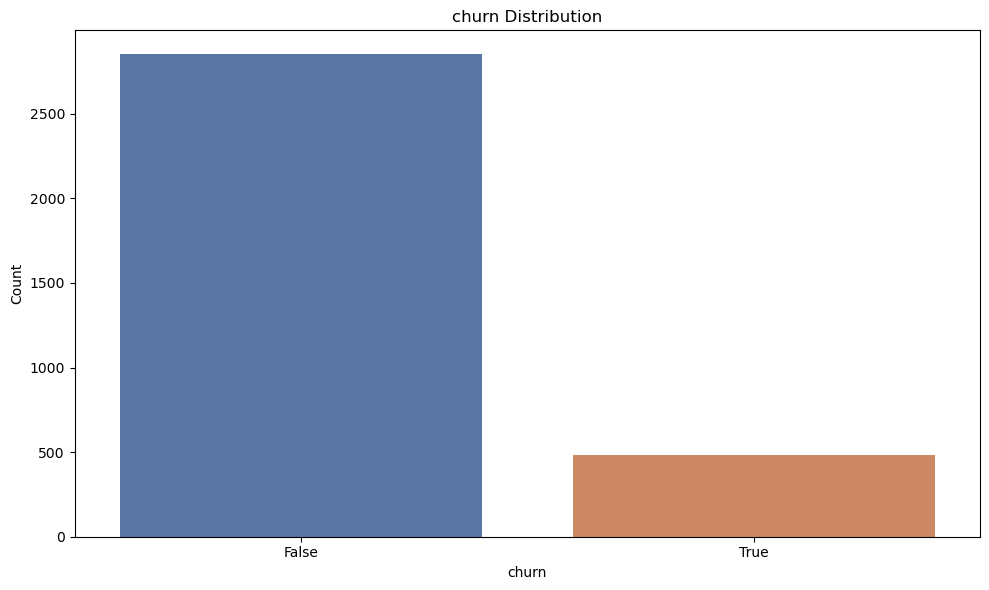

In [11]:
# distribution of the 'Churn' target column

# check the distribution of the unique values
print("Churn counts:")
print(df['churn'].value_counts())

# check for normalized counts as a percentage
print("\nChurn distribution (%):")
print(df['churn'].value_counts(normalize=True) * 100)

# visualize with a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='churn', data=df, palette='deep')
plt.title('churn Distribution')
plt.xlabel('churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show();

### Distribution of Area Code

Area code counts:
area code
415    1655
510     840
408     838
Name: count, dtype: int64

Area code distribution (%):
area code
415    49.654965
510    25.202520
408    25.142514
Name: proportion, dtype: float64


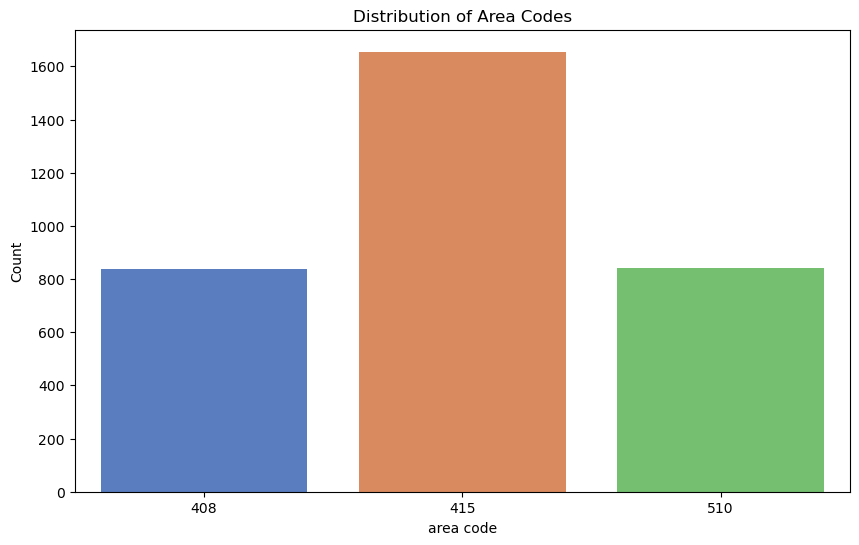

In [12]:
# check the distribution of the unique values
print("Area code counts:")
print(df['area code'].value_counts())

# check for normalized counts as a percentage
print("\nArea code distribution (%):")
print(df['area code'].value_counts(normalize=True) * 100)

# Countplot of area code
plt.figure(figsize=(10, 6))
sns.countplot(x='area code', data=df, palette='muted')
plt.title('Distribution of Area Codes')
plt.xlabel('area code')
plt.ylabel('Count')
plt.show()

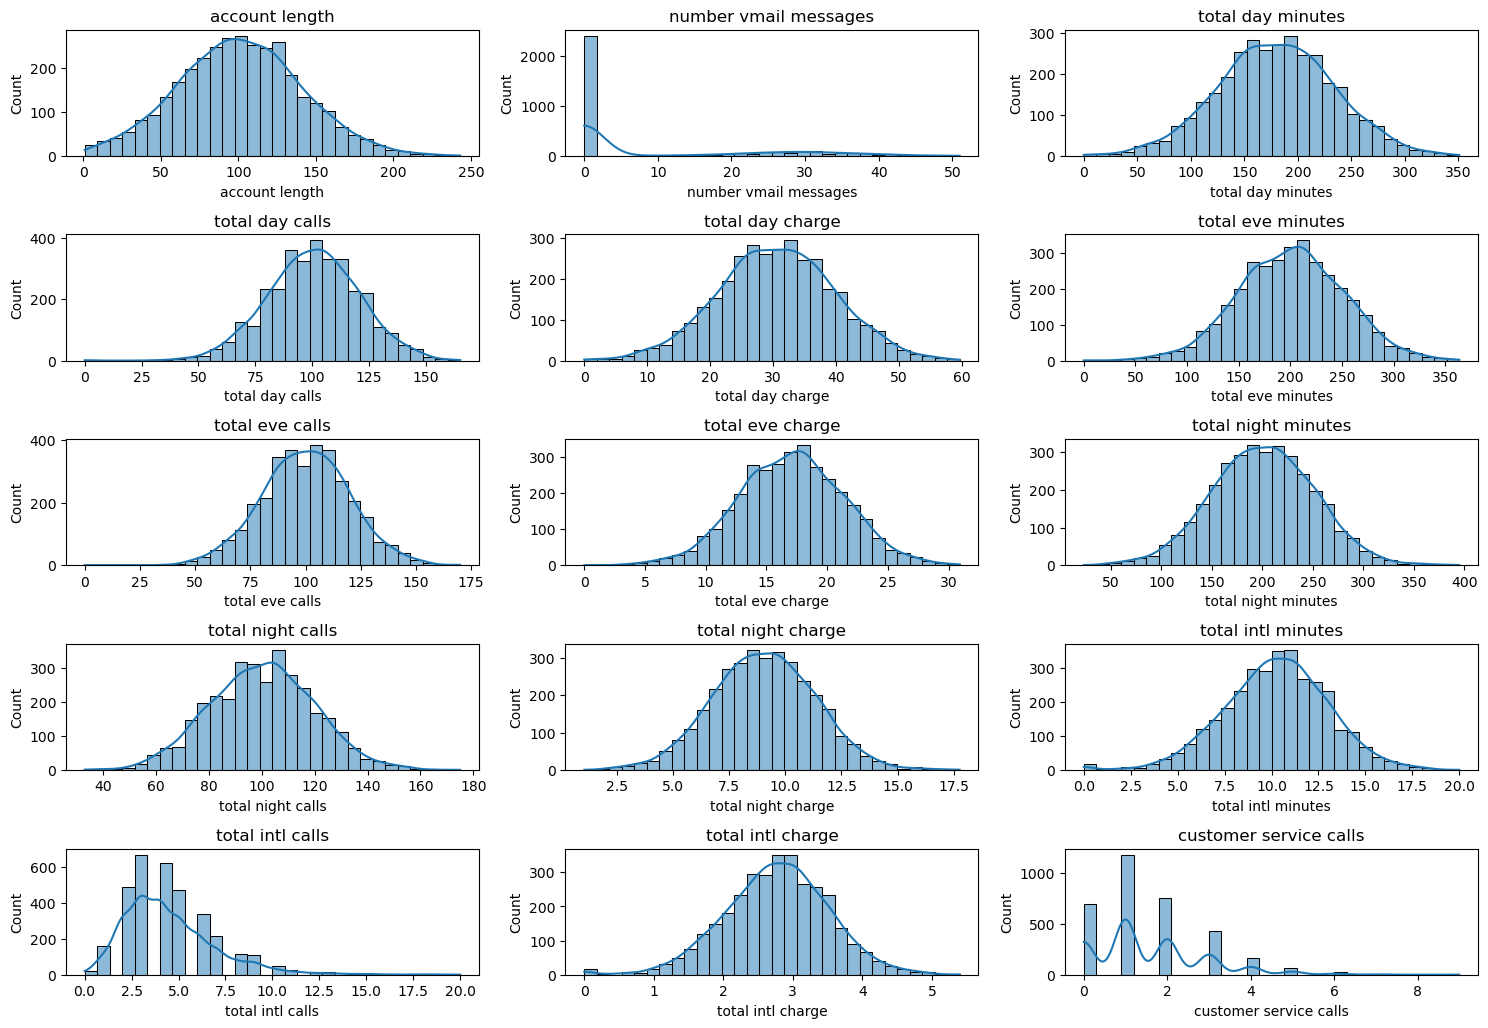

In [13]:
# define the numerical features
def numerical_distribution(df, features):
    fig, axes = plt.subplots(len(features)//3 + 1, 3, figsize=(15, 12))
    axes = axes.flatten()

    for i, col in enumerate(features):
        sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
        axes[i].set_title(col)

    # hide extra subplots
    for ax in axes[len(features):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()
numerical_features = [
    'account length', 'number vmail messages', 'total day minutes', 'total day calls', 
    'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 
    'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 
    'total intl calls', 'total intl charge', 'customer service calls'
]

# call the function
numerical_distribution(df, numerical_features)

### Distribution of categorical features

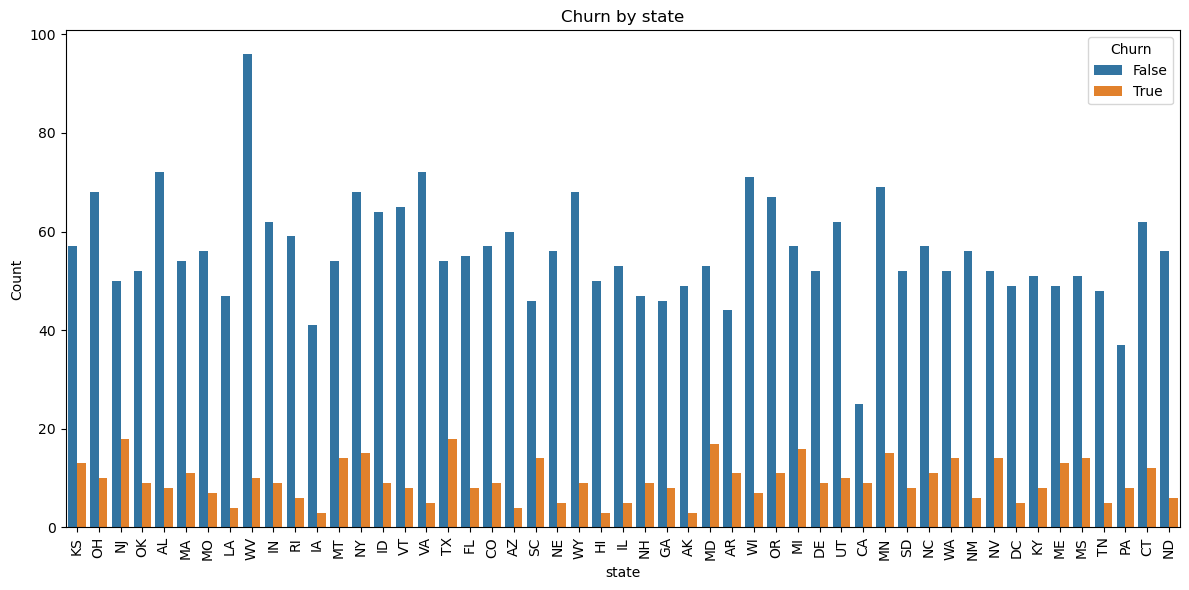

In [14]:
def categorical_churn(df, feature):
    
    df = df.copy()
    df["churn"] = df["churn"].astype(str)
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=feature, hue="churn")
    plt.title(f"Churn by {feature}")
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Churn", loc="upper right")
    plt.tight_layout()
    plt.show()
categorical_churn(df, 'state')


state
WV    106
MN     84
NY     83
AL     80
WI     78
Name: count, dtype: int64


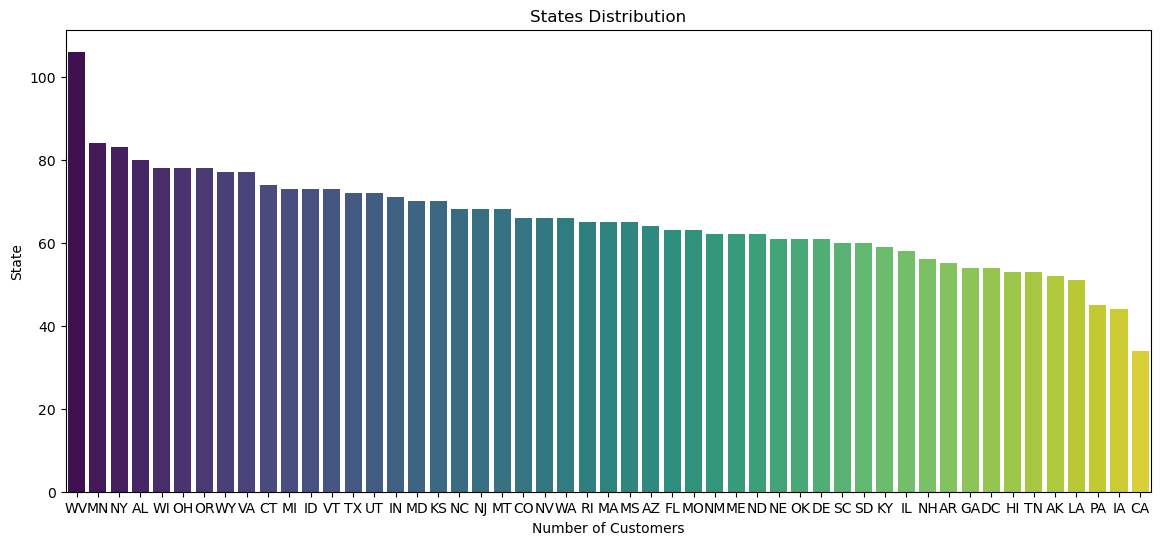

In [15]:
# Getstates distribution by count
states = df['state'].value_counts()
print(states.head())

plt.figure(figsize=(14,6))
sns.barplot(x = states.index, y = states.values, palette='viridis',order = states.index)

plt.title("States Distribution")
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.show()

### Customer Service Calls agains Churn

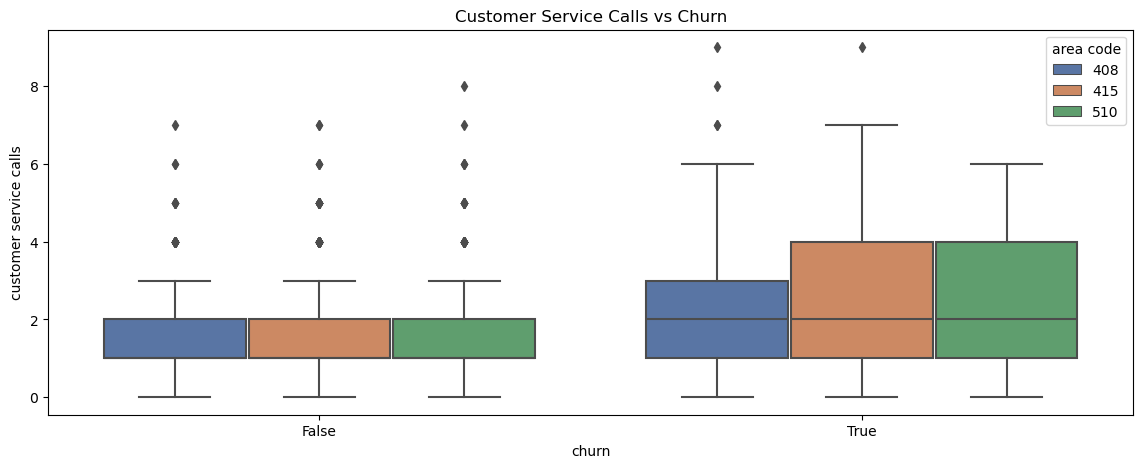

In [16]:
# boxplot to show area code with the highest churn
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x='churn', y='customer service calls', hue='area code', palette='deep')
plt.title('Customer Service Calls vs Churn')
plt.show()

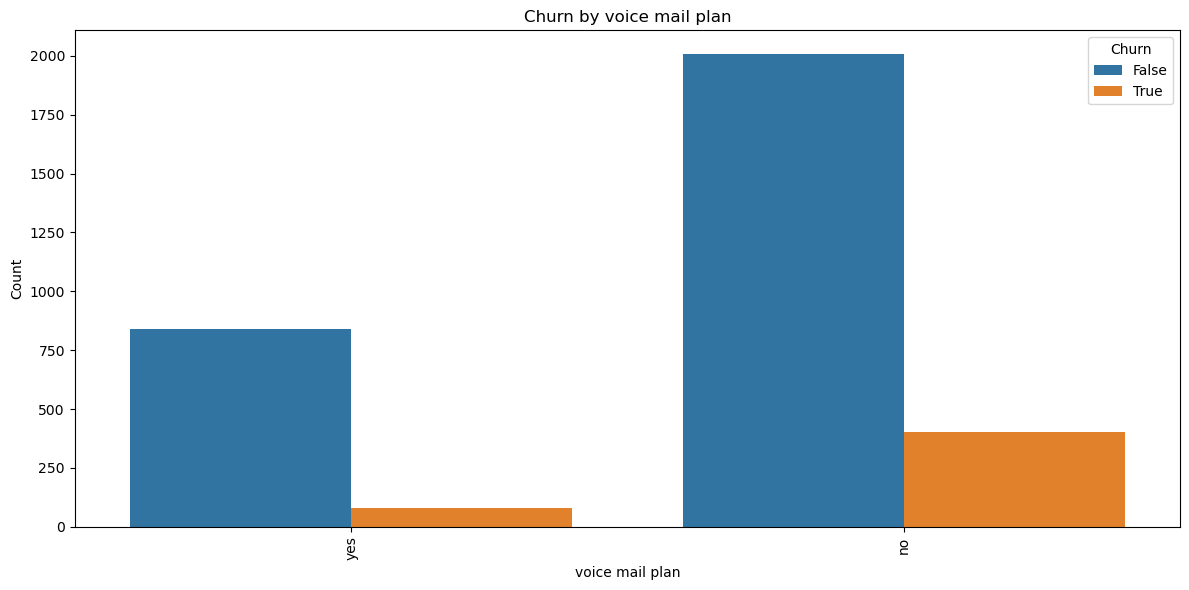

In [17]:
# pass the dataframe and feature
categorical_churn(df, 'voice mail plan')

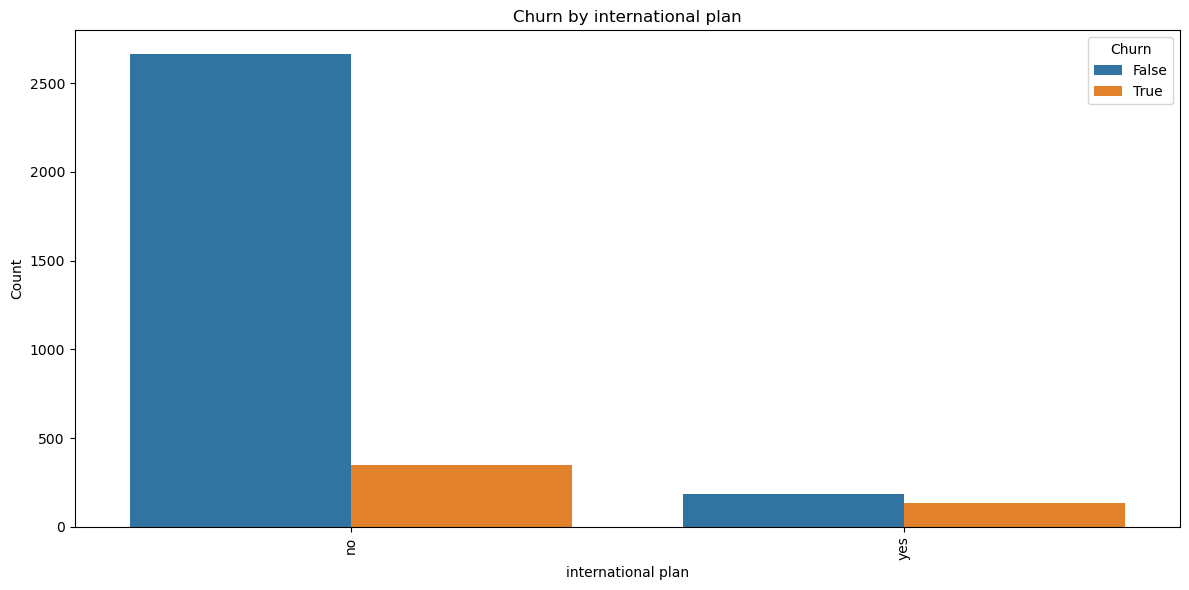

In [18]:
# pass the dataframe and feature
categorical_churn(df, 'international plan')

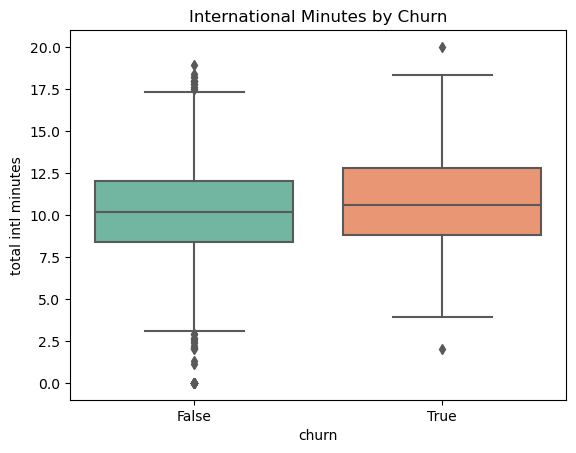

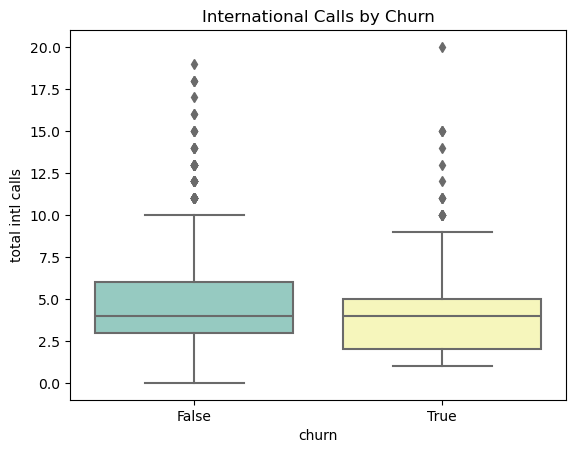

In [19]:
sns.boxplot(x='churn', y='total intl minutes', data=df, palette='Set2')
plt.title("International Minutes by Churn")
plt.show()

sns.boxplot(x='churn', y='total intl calls', data=df, palette='Set3')
plt.title("International Calls by Churn")
plt.show()

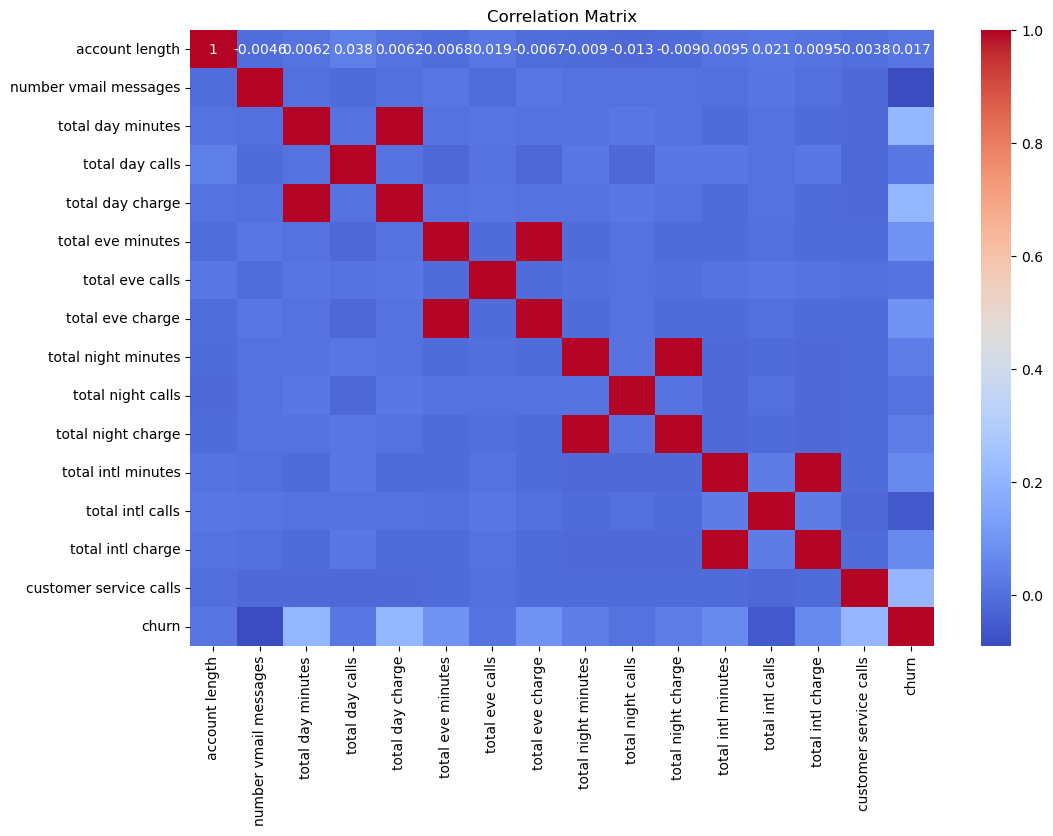

In [20]:
# Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dropped features: ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']


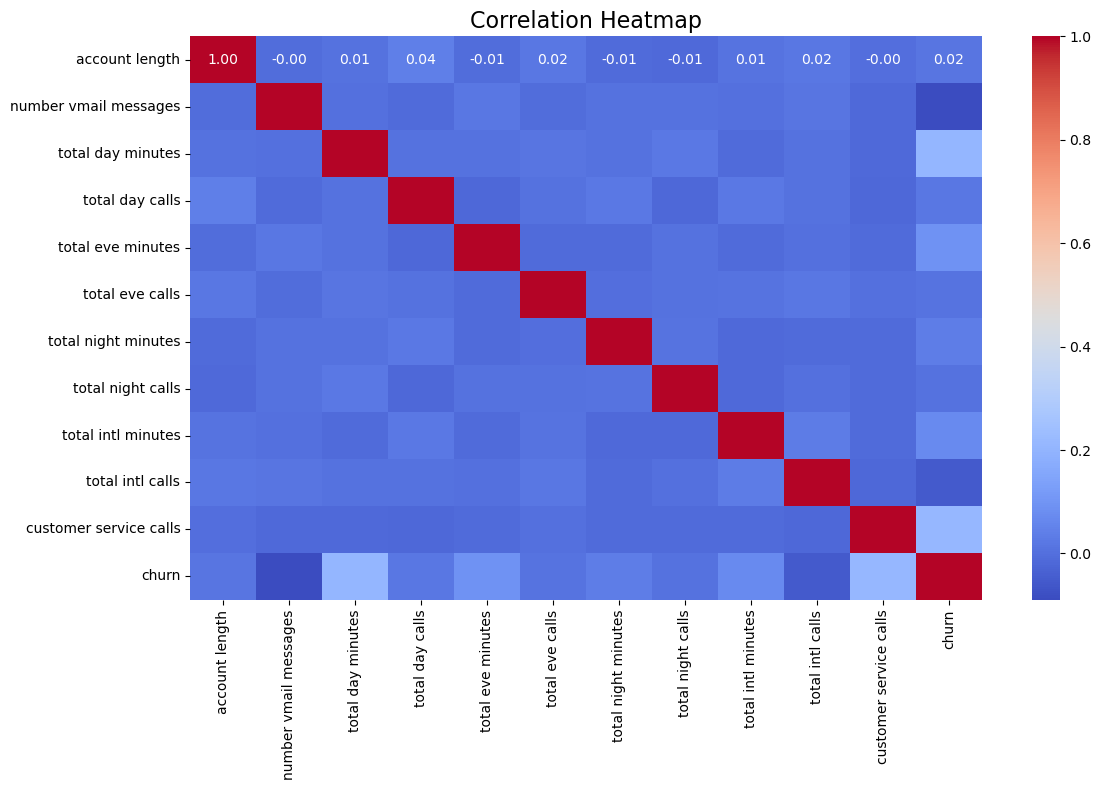

In [21]:
# Drop highly correlated features 
def drop_highly_correlated_features(df, threshold=0.9):
    # correlation matrix
    corr_matrix = df.corr(numeric_only=True).abs()
    
    # take upper triangle (to avoid duplicate checks)
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    
    # features with correlation > threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # drop and return
    return df.drop(columns=to_drop), to_drop


# correlation heatmap
def correlation_heatmap(df):
    plt.figure(figsize=(12,8))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Heatmap", fontsize=16)
    plt.tight_layout()
    plt.show()


# use this fuction
cleaned_df, dropped_features = drop_highly_correlated_features(df, threshold=0.9)

print("Dropped features:", dropped_features)

correlation_heatmap(cleaned_df)

## Handling Outliers

In [22]:
def remove_outliers_zscore(df, z_threshold=3.0):
    numeric_df = df.select_dtypes(include=[np.number])
    z_scores = np.abs((numeric_df - numeric_df.mean()) / numeric_df.std())
    
    # keep rows where all Z-scores are below the threshold
    mask = (z_scores < z_threshold).all(axis=1)
    return df[mask]
cleaned_df = remove_outliers_zscore(cleaned_df, z_threshold=3.0)

print("Shape of dataset after removing outliers:", cleaned_df.shape)

Shape of dataset after removing outliers: (3169, 16)


### How the code works;

Identify numeric columns: We select all columns of numeric dtype(integers and floats)

Compute the Z-scores: Using scipy.stats.zscore() on only the numeric columns. Any NaNs detected in the numeric columns are temporarily treated in such a way that they don't trigger an outlier removal (i.e., we fill the Nans with a 0 for comparison)

Create a boolean mask: For each row, check if any numeric column's absolute Z-score is <= z_threshold. Rows that fail(i.e. have at least one numeric value beyond the threshold) get dropped.

Return a filtered DataFrame: We use .loc[mask] to keep only rows that passed the Z-score test, and return a fresh copy.

## Data Preprocessing

Data preprocessing is the process of transforming raw data into a usable format for analysis or modeling. It involves steps like encoding categorical variables and scaling features. Proper preprocessing ensures that the data is accurate, consistent, and suitable for machine learning algorithms.

In this section we will perform the following preprocessing steps: Label Encoding, One-Hot Encoding and Feature Scaling

### One-Hot Encoding

This is a technique used to convert categorical variables into a numerical format. It creates binary (0 or 1) columns for each category, indicating the presence of a category in a given observation. This method allows machine learning models to process categorical data without assuming any ordinal relationship.

In this section, we will perform one-hot encoding on the following columns: State, Area_Code, International_Plan, and Voice_Mail_Plan

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns to encode 
categorical_cols = ['state', 'area code', 'international plan', 'voice mail plan']

#Create ColumnTransformer with OneHotEncoder 
one_hot_encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse=False), categorical_cols)
    ],
    remainder='passthrough' 
)
#keep the columns as they are
#Fit and transform the data 
encoded_array = one_hot_encoder.fit_transform(cleaned_df)

#get the new encoded column names
encoded_columns = one_hot_encoder.named_transformers_['onehot'].get_feature_names_out(categorical_cols)

#Build new dataFrame with encoded + numeric columns 
preprocessed_df = pd.DataFrame(
    encoded_array, 
    columns=list(encoded_columns) + list(cleaned_df.drop(columns=categorical_cols).columns)
)

# check the shape of the encoded DataFrame
print("Shape of dataset after one-hot encoding:", preprocessed_df.shape)

Shape of dataset after one-hot encoding: (3169, 66)


### Label Encoding

Label Encoding is a technique used to convert categorical text data into numerical values. Each unique category is assigned an integer label. In this section, we will use label encoding on the Churn target variable to encode it to 0(False) and 1(True).

In [24]:
# use label encoding on Churn column
label_encoder = LabelEncoder()
preprocessed_df['churn'] = label_encoder.fit_transform(preprocessed_df['churn'])

# display first 5 rows
preprocessed_df['churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

### Data Scaling
This is the process of transforming features so they fall within a similar range. It ensures that no feature dominates another due to its magnitude, which helps improve model performance and convergence. In this section, we will implement Min-Max scaling in order to normalize the features to a fixed range of -1 to 1. This will ensure that each feature contributes equally during model training. This step will be taken in the modeling phase, when we define our X and y variables

##  Modeling

In this section, we will build a prediction model that can predict customer churn based on the features in our dataset. This stage is very critical as it will help us in knowing the actual customers who churn in the company, and will guide in providing key insights that will necessitate the retention of customers in the company.

In order to build a robust, effective model, we will train and evaluate five different models, and pick the model that will portray the highest performance on unseen dat


We will evaluate the performance of five distinct machine learning models:

Logistic Regression: This will serve as our baseline model, providing a point of comparison for the more complex algorithms.

Decision Tree: A non-parametric supervised learning algorithm used for both classification and regression.

Random Forest: An ensemble method that combines multiple decision trees to improve predictive accuracy and control for overfitting.

XGBoost: An optimized distributed gradient boosting library, known for its speed and performance.

K-Nearest Neighbors (KNN): A simple, non-parametric algorithm that classifies data points based on the proximity of its neighbors.

First, we will define our X and y variables. The X variable will represent the features in the dataset, while the y variable will represent the target.eformance.

In [25]:
# define X and y variables
X = preprocessed_df.drop(columns='churn', axis=1)
y = preprocessed_df['churn']

# display the first 5 rows of X
X.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,166.7,113,148.3,122,186.9,121,10.1,3,3


After defining our X and y variables, we will partition the data into training and testing sets. We will use an 80/20 split, allocating 80% of the dataset for training and the remaining 20% for testing our models.

Next, we will scale the X features using a MinMaxScaler() function.  This method is ideal for models like K-Nearest Neighbors and Logistic Regression because it normalizes the numerical values to a range of 0 to 1, ensuring no single feature's magnitude dominates the model's learning process.

In [26]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# scale the train and test features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# display the shape of thr train and test sets
print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of scaled X_train: (2535, 65)
Shape of scaled X_test: (634, 65)
Shape of y_train: (2535,)
Shape of y_test: (634,)


## Class Imbalance

From our earlier analysis, we observed that the target variable has a high class imbalance. We can show this again using the y_train variable:

In [27]:
# check the distribution of the unique values
print("Churn counts:")
print(y_train.value_counts())

# check for normalized counts as a percentage
print("\nChurn distribution (%):")
print(y_train.value_counts(normalize=True) * 100)

Churn counts:
churn
0    2181
1     354
Name: count, dtype: int64

Churn distribution (%):
churn
0    86.035503
1    13.964497
Name: proportion, dtype: float64


The target variable in our dataset exhibits a significant imbalance: the '0' class accounts for approximately 86.04% (2181 instances), 
while the '1' class constitutes just 13.97% (354 instances).


To mitigate this issue, we will employ a technique called SMOTE (Synthetic Minority Over-sampling Technique). 

This method addresses class imbalance by generating synthetic samples for the minority class. SMOTE works by selecting an example from the minority class and creating a new, synthetic data point by interpolating between that example and one of its nearest neighbors.


The addition of these synthetic samples helps to balance the training dataset, preventing our machine learning models from becoming biased towards the majority class. In this section, we will apply SMOTE to our training data to create a more balanced dataset for effective model training

In [28]:
# import the imblearn library
from imblearn.over_sampling import SMOTE, SMOTENC

# instantiate the SMOTE function
smote = SMOTENC(categorical_features=[1, 2], random_state=42)

# fit and resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# check the unique values in y_train
y_train_smote.value_counts()

churn
0    2181
1    2181
Name: count, dtype: int64

Now that we have balanced the dataset, we can proceed to the actual modeling. We will start with the LogisticRegression() as our baseline model, and build other models sequentially.

## Logistic Regression 

In [29]:
# instantiate a Logistic regression model
log_model = LogisticRegression(random_state=42)

# fit the training data
log_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_log = log_model.predict(X_test_scaled)

# compute the accuracy of the model
log_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Regression model accuracy:", log_acc)

Logistic Regression model accuracy: 0.7823343848580442


In [30]:
# display the classification report
log_report = classification_report(y_true=y_test, y_pred=y_pred_log)
print("Logistic Regression classification report\n")
print(log_report)

Logistic Regression classification report

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       546
           1       0.36      0.76      0.49        88

    accuracy                           0.78       634
   macro avg       0.66      0.77      0.68       634
weighted avg       0.87      0.78      0.81       634



From the classification report, the recall score is about 0.76, which implies that out of all the customers who churned from the company, the model was able to predict 75% of them correctly. This is a fair score, for a baseline model.

To get a better understanding of this score, we can plot a confusion matrix to see the ratio of true positives, true negatives, false positives, and false negatives.

Confusion Matrix:
 [[429 117]
 [ 21  67]]


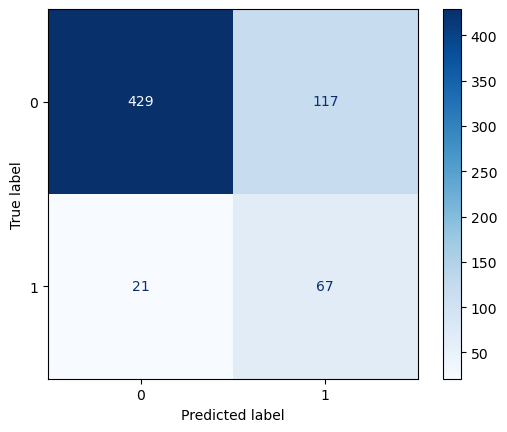

In [31]:
# Import plot_confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(y_test, y_pred_log)
print('Confusion Matrix:\n', cnf_matrix)
# Visualize your confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix , display_labels=log_model.classes_)
disp.plot(cmap=plt.cm.Blues)

From the confusion matrix plot, the true positive and true negative have the highest values, implying that the model is making correct predictions more frequently than incorrect predictions. This also shows that the model is not overfitting

In [32]:
# Instantiate a decision tree model
dec_model = DecisionTreeClassifier(random_state=42)

# fit the training data
dec_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_dec = dec_model.predict(X_test_scaled)

# compute the accuracy of the model
dec_acc = accuracy_score(y_test, y_pred_dec)
print("Decision Tree model accuracy:", dec_acc)

Decision Tree model accuracy: 0.886435331230284


In [33]:
# display the classification report
dec_report = classification_report(y_true=y_test, y_pred=y_pred_dec)
print("Decision Tree classification report\n")
print(dec_report)

Decision Tree classification report

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       546
           1       0.57      0.78      0.66        88

    accuracy                           0.89       634
   macro avg       0.76      0.84      0.79       634
weighted avg       0.91      0.89      0.89       634



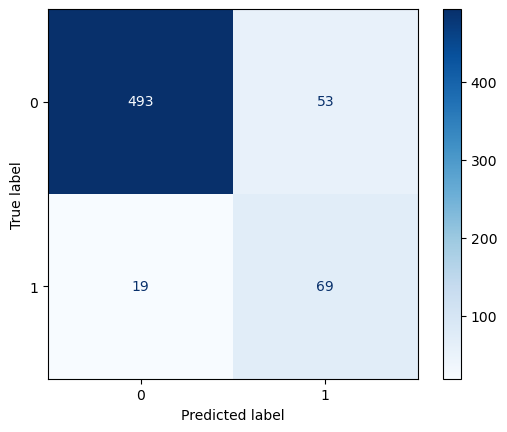

In [34]:
cnf_matrix = confusion_matrix(y_test, y_pred_dec)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix , display_labels=dec_model.classes_)
disp.plot(cmap=plt.cm.Blues)

In [35]:
# instantiate a random forest model
ran_model = RandomForestClassifier(random_state=42)

# fit the training data
ran_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_ran = ran_model.predict(X_test_scaled)

# compute the accuracy of the model
ran_acc = accuracy_score(y_test, y_pred_ran)
print("Random Forest model accuracy:", ran_acc)

Random Forest model accuracy: 0.9148264984227129


In [36]:
ran_report = classification_report(y_true=y_test, y_pred=y_pred_ran)
print(ran_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       546
           1       0.69      0.70      0.70        88

    accuracy                           0.91       634
   macro avg       0.82      0.83      0.82       634
weighted avg       0.92      0.91      0.92       634



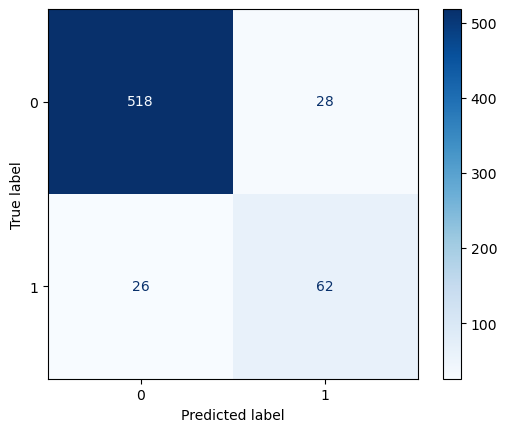

In [37]:
cnf_matrix = confusion_matrix(y_test, y_pred_ran)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix , display_labels=ran_model.classes_)
disp.plot(cmap=plt.cm.Blues)

The Decision Tree model has a recall score of about 0.75, similar to the Logistic Regression model, which implies that out of all the customers who churned from the company, the model was able to predict 75% of them correctly.

From the confusion matrix plot, the true positive and true negative have the highest values, implying that the model is making correct predictions more frequently than incorrect predictions. This also shows that the model is not overfitting (i.e. performing poorly on unseen test data)

In [38]:
# instantiate a K-nearest neighbor model
knn_model = KNeighborsClassifier(n_neighbors=5) # start with 5 neighbors

# fit the training data
knn_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_knn = knn_model.predict(X_test_scaled)

# compute the accuracy of the model
knn_acc = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbor model accuracy:", knn_acc)

K-Nearest Neighbor model accuracy: 0.7350157728706624


In [39]:
# display the classification report
knn_report = classification_report(y_true=y_test, y_pred=y_pred_knn)
print("K-Nearest Neighbor classification report\n")
print(knn_report)

K-Nearest Neighbor classification report

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       546
           1       0.23      0.40      0.29        88

    accuracy                           0.74       634
   macro avg       0.56      0.59      0.57       634
weighted avg       0.80      0.74      0.76       634



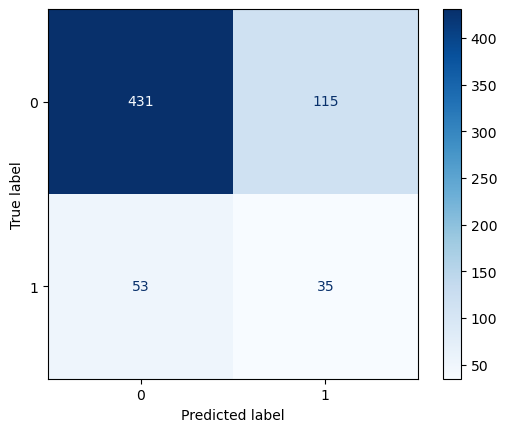

In [40]:
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix , display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)

In [41]:
# instantiate a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42) 

# fit the training data
gb_model.fit(X_train_smote, y_train_smote)

# make predictions on test set
y_pred_gb = gb_model.predict(X_test_scaled)

# compute the accuracy of the model
gb_acc = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting model accuracy:", gb_acc)

Gradient Boosting model accuracy: 0.9290220820189274


In [42]:
#lets check classification report
gb_report = classification_report(y_true=y_test, y_pred=y_pred_gb)
print(gb_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       546
           1       0.71      0.82      0.76        88

    accuracy                           0.93       634
   macro avg       0.84      0.88      0.86       634
weighted avg       0.93      0.93      0.93       634



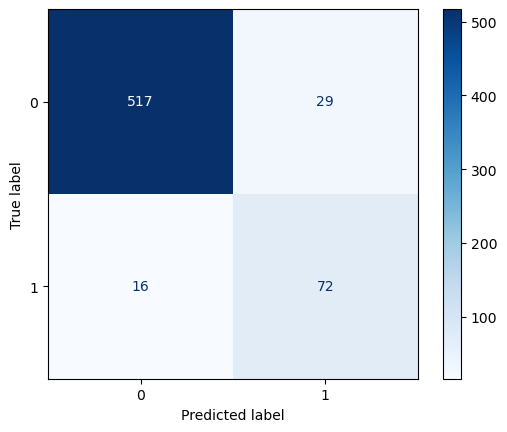

In [43]:
cnf_matrix = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix , display_labels=gb_model.classes_)
disp.plot(cmap=plt.cm.Blues)

The Gradient Boosting model has a recall score of about 0.82, which is higher than the recall scores of the other models. This implies that out of all the customers who churned from the company, the model was able to predict 82% of them correctly, which is the best prediction rate thus far.

From the confusion matrix plot, the true positive and true negative have the highest values, implying that the model is making correct predictions more frequently than incorrect predictions. This also shows that the model is not overfitting (i.e. performing poorly on unseen test data)

## Model Evaluation
In this section, we will evaluate the model performance, and pick the best two, which we will perform hyperparameter tuning on, to select the best performing model. As I had mentioned before, we will use recall and ROC-AUC Curve, to measure model performance

An ROC (Receiver Operating Characteristic) curve is a graphical representation used to evaluate the performance of a binary classification model. It plots the True Positive Rate (TPR) (Recall) against the False Positive Rate (FPR) at various threshold settings. The curve illustrates how well a model distinguishes between the two classes.

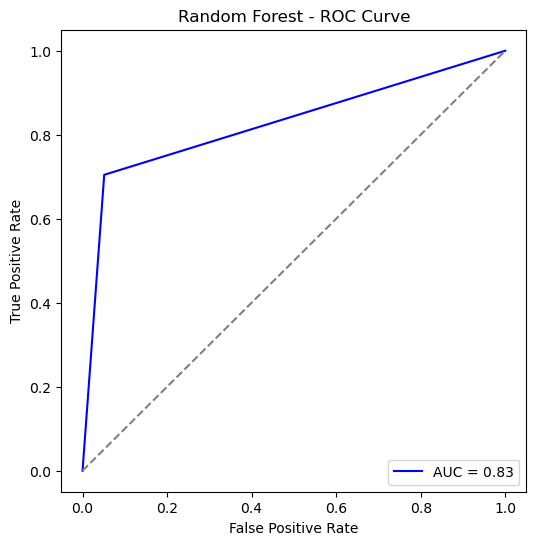

In [44]:
#ROC Curve & AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ran)
roc_auc = roc_auc_score(y_test, y_pred_ran)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.legend(loc="lower right")
plt.show()

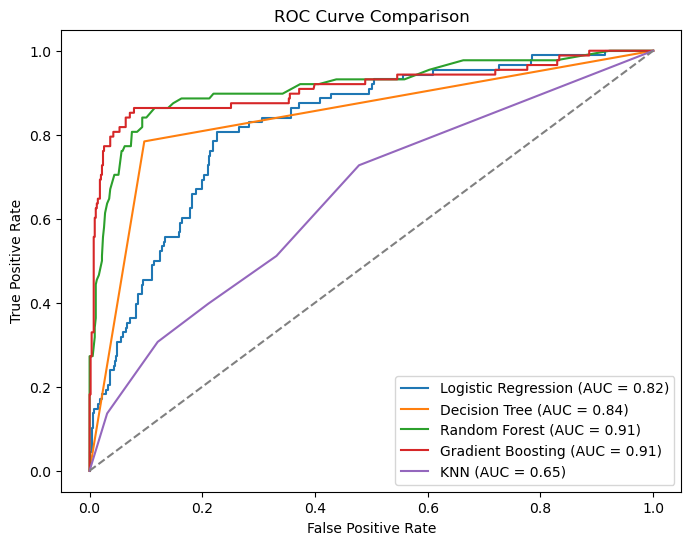

In [45]:

# Logistic Regression ROC
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

# Decision Tree ROC
fpr_dec, tpr_dec, _ = roc_curve(y_test, dec_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_dec = auc(fpr_dec, tpr_dec)

# Random Forest ROC
fpr_ran, tpr_ran, _ = roc_curve(y_test, ran_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_ran = auc(fpr_ran, tpr_ran)

# Gradient Boosting ROC
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)
y_pred_gb_proba = gb_model.predict_proba(X_test_scaled)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_proba)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# KNN ROC
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot all ROC Curves
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_dec, tpr_dec, label=f"Decision Tree (AUC = {roc_auc_dec:.2f})")
plt.plot(fpr_ran, tpr_ran, label=f"Random Forest (AUC = {roc_auc_ran:.2f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")

# baseline diagonal
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

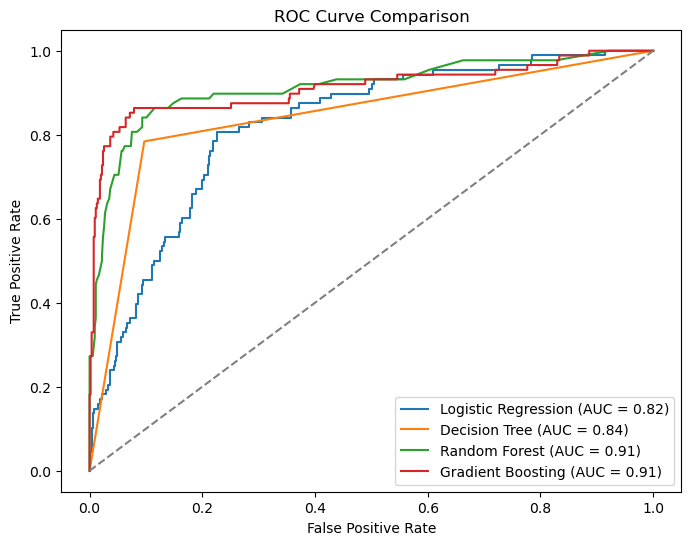

In [46]:
#Fit Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)

# get predicted probabilities
y_pred_gb_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# ROC for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

# ROC for Decision Tree
fpr_dec, tpr_dec, _ = roc_curve(y_test, dec_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_dec = auc(fpr_dec, tpr_dec)

#ROC for Random Forest
fpr_ran, tpr_ran, _ = roc_curve(y_test, ran_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_ran = auc(fpr_ran, tpr_ran)

# ROC for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_proba)
roc_auc_gb = auc(fpr_gb, tpr_gb)

#Plot ROC Curves
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_dec, tpr_dec, label=f"Decision Tree (AUC = {roc_auc_dec:.2f})")
plt.plot(fpr_ran, tpr_ran, label=f"Random Forest (AUC = {roc_auc_ran:.2f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")

# baseline diagonal
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


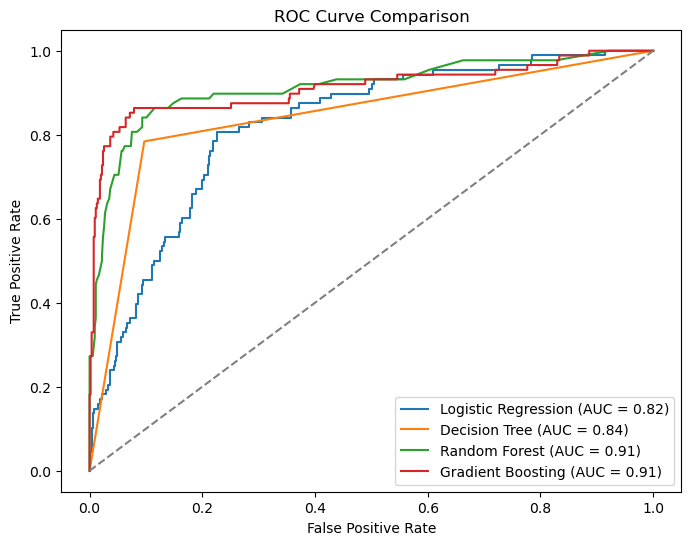

In [47]:
#Plot ROC Curves 
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_dec, tpr_dec, label=f"Decision Tree (AUC = {roc_auc_dec:.2f})")
plt.plot(fpr_ran, tpr_ran, label=f"Random Forest (AUC = {roc_auc_ran:.2f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")

# baseline diagonal
plt.plot([0,1], [0,1], color='gray', linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

From the ROC Curve plot, we can see that Random Forest and Gradient Boosting have the highest AUC scores, with Gradient Boosting having an AUC score of 0.912, and Random Forest having an AUC score of 0.91.Logistic regression having a AUC of 0.82

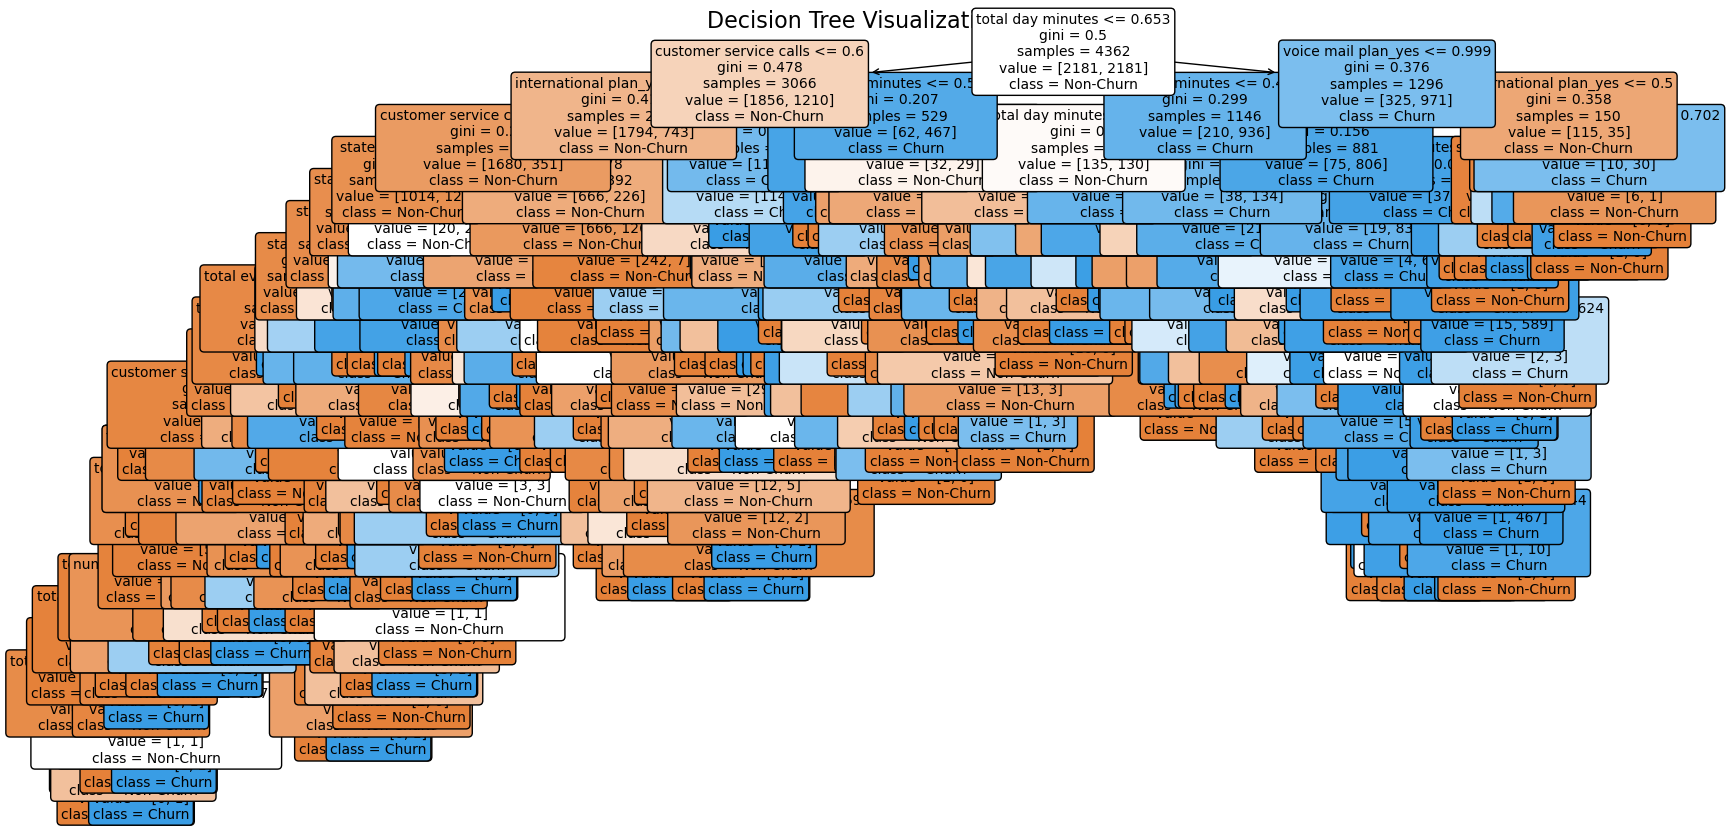

In [48]:
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X.columns)

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(
    dec_model,
    feature_names=X_train_smote_df.columns,   # now it has names
    class_names=["Non-Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

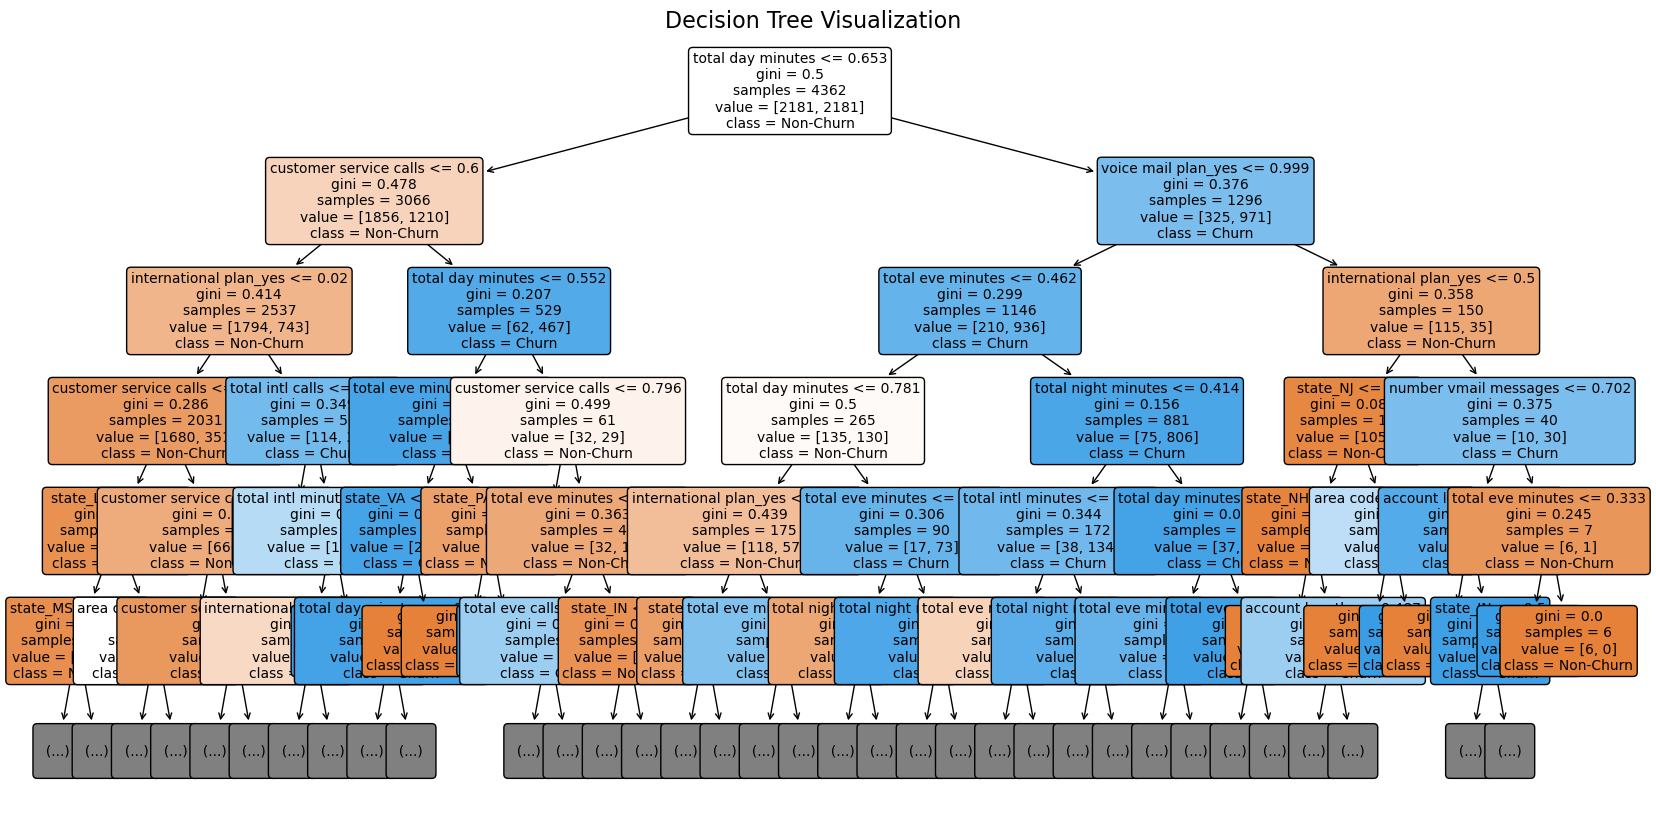

In [49]:
# Rebuild SMOTE data into a DataFrame with column names
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X.columns)

# Plot the Decision Tree (limit depth for readability)
plt.figure(figsize=(20,10))
plot_tree(
    dec_model,
    feature_names=X_train_smote_df.columns,
    class_names=["Non-Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=5     #  show only top 5 levels
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

The Decision Tree plot shows that Customer_Service_Calls is the most important feature for predicting churn. Customers with more than 3 service calls are more likely to churn. Subsequent splits highlight features such as Total_Day_Charge and International_Plan that further differentiate churners from non-churners. Leaf nodes display the predicted class and sample counts, indicating the confidence of predictions. Overall, the tree provides a clear, interpretable view of the key factors driving customer churn.

## Business Recommendations

1. Enhance Customer Service Efficiency:  A high amount of customer service interactions with customers is seen to increase churn. Investing in comprehensive training sessions for support stuff, and implmenting better issue/conflict resolution frameworks can significantly boost customer satisfation, and in turn minimize the rate of customer churn.
2. Review and Optimize Call Rate Plans: A large proportion of churners are linked to high day, evening, night, and international call charges. Reassessing the current pricing structure and introducing more competitive or bundled rate plans will make services more attractive and cost-effective, reducing churn caused by price dissatisfaction
3. Targeted Incentives for High-Churn Area Codes: Customers in area codes 415 and 510 show a higher likelihood of churn. Introducing specialized incentives such as discounts, loyalty rewards, or exclusive promotions for these regions can help retain at-risk customers and strengthen long-term relationships.
4. State-Specific Retention Strategies: States such as Texas, New Jersey, Maryland, Florida (Miami), and New York exhibit above-average churn rates. Developing localized retention strategies, including personalized engagement, region-specific promotions, and enhanced customer support, will help strengthen loyalty in these high-risk markets.

## Next Steps

### Model Improvement

* Hyperparameter Optimization: Apply Grid Search (or Randomized Search) to fine-tune hyperparameters for better performance and generalization.

* Handling Class Imbalance: Explore resampling techniques such as class weights, ADASYN, or ensemble methods to address imbalance and improve churn prediction.

* Feature Engineering: Derive new variables (e.g., customer lifetime value, call pattern ratios) to increase model robustness and predictive power.

* Preprocessing Pipelines: Implement automated preprocessing pipelines (scaling, encoding, feature selection) to reduce data leakage and ensure consistent transformations across training and production.

### Deployment Strategy

* Model Packaging: Export the trained model along with all preprocessing objects (scalers, encoders, pipelines) and freeze Python library versions (pip freeze) to ensure reproducibility.

* Containerization: Use Docker to containerize the model and dependencies. Employ tools like Docker Compose or Kubernetes for orchestration and scalability.

* Serving the Model: Wrap the model using lightweight frameworks such as FastAPI for REST API endpoints. Alternatively, explore Streamlit and Hugging Face Spaces for interactive deployment and user-friendly interfaces.


* Automate retraining with unit tests and validation checks.

* Build and push Docker images to Docker Hub or another container registry.

* Deploy to staging environments for sanity checks before rolling out to production.

* Enable smooth updates with a rolling deployment strategy to minimize downtime.

## Conclusion 
From our prediction modeling analysis, The K nearest model had a recall score of 0.40, while the Gradient Boosting model achieved a recall score of 0.82. However, the Gradient Boosting model had a higher AUC score of 0.921, while the Random forest model had an AUC score of 0.911. We were able to meet all our set objectives, which were to build a customer churn prediction model with a recall score of 0.8 and above, and to identify the key features that contribute significantly to customer churn, which include Customer Service Calls, Total Day Charge, and International Plan. Due to the nature of the project and the prediction problem, I would recommend the XGBoost classifier model with a higher recall for predicting customer churn rates at SyriaTel Telecommunication company.